In [1]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
from TD3_helpers import *
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [2]:
np.set_printoptions(suppress=True)
reload(h_env)

C:\Users\lenna\anaconda3\envs\rl-proj\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\lenna\anaconda3\envs\rl-proj\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'laserhockey.hockey_env' from 'C:\\Users\\lenna\\Desktop\\RL\\Project\\RL-Hockey\\laserhockey\\hockey_env.py'>

In [4]:
start_config = {
    "name" : "name",
    "agent_type" : "TD3",
    "env_type" : "hockey",
    "test" : False,
    "render" : False,
    "episodes" : 400,
    "mode" : "normal",
    "eps" : 0.1,
    "discount":0.99,
    "update_target_every":100,
    "update_policy_every":2,
    "hidden_sizes_actor" : [256,256],
    "hidden_sizes_critic" : [256,256],
    "iter_fit" : 1,
    "batch_size" : 256,
    "smoothing_std"  : 0.0001,
    "smoothing_clip" : 0.0002,
    "checkpoint1" : None,
    "checkpoint2" : None,
    "learning_rate_critic": 0.001,
    "learning_rate_actor": 0.001,
    "buffer_size" : int(1e6),
    "theta" : 0.005,
    "prio_replay" : False,
    "exp_phase" : 0,
    "cdq" : True
}

In [8]:
config = start_config.copy()
name = "even more weak"
mode = "weak"
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{name}_{mode}_agent.pth'
config["name"] = "weak_4th"
config["mode"] = "weak"
config["episodes"] = 1000
config["learning_rate_critic"] = 0.00001
config["learning_rate_actor"] = 0.00001
config["eps"] = 0.05
config["test"] = True
init_train(config)
config["test"] = False
init_train(config)
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
config["test"] = True
init_train(config)

Testing...: 100%|████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.34episodes/s]


Wins: 491
Losses: 6
W/L: 81.83333333333333


Training...:   2%|█                                                            | 17/1000 [00:53<51:33,  3.15s/episodes]


KeyboardInterrupt: 

Testing...: 100%|██████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.66episodes/s]


Wins: 249
Losses: 1
W/L: 249.0


Training...: 100%|█████████████████████████████████████████████████████████████| 500/500 [36:38<00:00,  4.40s/episodes]

Wins: 201
Losses: 28
W/L: 7.178571428571429


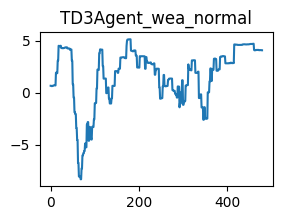

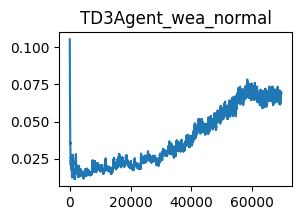

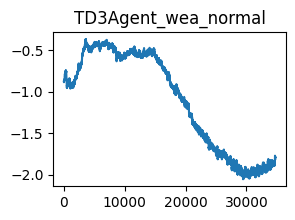

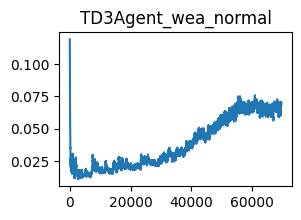

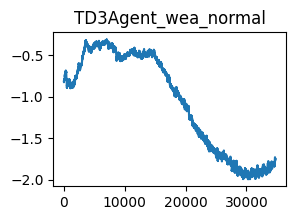

Testing...: 100%|██████████████████████████████████████████████████████████████| 500/500 [00:35<00:00, 13.89episodes/s]

Wins: 210
Losses: 10
W/L: 21.0


In [21]:
config = start_config.copy()
name = "agent_compare_newsmooth_ou"
mode = "weak"
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{name}_{mode}_agent.pth'
config["name"] = "weak_normal_ou"
config["mode"] = "normal"
config["episodes"] = 500
config["learning_rate_critic"] = 0.001
config["learning_rate_actor"] = 0.001
config["test"] = True
init_train(config)
config["test"] = False
init_train(config)
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
config["test"] = True
init_train(config)

In [10]:

#config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{name}_{mode}_agent.pth'
config["name"] = "weak 4th"
config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
config["mode"] = "weak"
config["test"] = True
init_train(config)
config["mode"] = "normal"
config["test"] = True
init_train(config)

Testing...: 100%|████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.37episodes/s]


Wins: 500
Losses: 0
W/L: 500.0


Testing...: 100%|████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.16episodes/s]

Wins: 498
Losses: 2
W/L: 249.0
